In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
data = "In the town of Athy one Jeremy Lanigan \n battered away til he hadnt a pound. \nHis father died and made .. "
corpus = data.lower().split("\n")

In [3]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1

print(tokenizer.word_index)
print(total_words) #unique words

{'in': 1, 'the': 2, 'town': 3, 'of': 4, 'athy': 5, 'one': 6, 'jeremy': 7, 'lanigan': 8, 'battered': 9, 'away': 10, 'til': 11, 'he': 12, 'hadnt': 13, 'a': 14, 'pound': 15, 'his': 16, 'father': 17, 'died': 18, 'and': 19, 'made': 20}
21


In [6]:
import numpy as np

#Turn the corpus into training data
input_sequences =[]
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
        
#Longest sequence in the corpus
max_sequence_len = max([len(x) for x in input_sequences])

#Padded input sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding ='pre'))

#Split sequences into x and y
xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]

#One hot encoding the labels
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
    

In [14]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length = max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(xs,ys,epochs =50, verbose =1)

Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 3.0449 - acc: 0.0588
Epoch 2/50
1/1 [==============================] - 0s 23ms/step - loss: 3.0404 - acc: 0.0588
Epoch 3/50
1/1 [==============================] - 0s 24ms/step - loss: 3.0359 - acc: 0.0588
Epoch 4/50
1/1 [==============================] - 0s 24ms/step - loss: 3.0314 - acc: 0.1176
Epoch 5/50
1/1 [==============================] - 0s 32ms/step - loss: 3.0268 - acc: 0.1176
Epoch 6/50
1/1 [==============================] - 0s 53ms/step - loss: 3.0222 - acc: 0.1176
Epoch 7/50
1/1 [==============================] - 0s 49ms/step - loss: 3.0174 - acc: 0.1176
Epoch 8/50
1/1 [==============================] - 0s 48ms/step - loss: 3.0125 - acc: 0.1176
Epoch 9/50
1/1 [==============================] - 0s 27ms/step - loss: 3.0075 - acc: 0.1176
Epoch 10/50
1/1 [==============================] - 0s 26ms/step - loss: 3.0024 - acc: 0.1176
Epoch 11/50
1/1 [==============================] - 0s 53ms/step - loss: 2.9970 - 

In [15]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

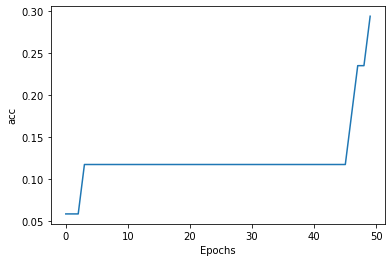

In [16]:
plot_graphs(history,'acc')

In [ ]:
#Predicting words
seed_text = "Stephany went to dubling"
next_words = 100

for _ in range

